In [9]:
from arcgis import GIS
import pandas as pd
import numpy as np

In [23]:
gis = GIS()
item = gis.content.get("e3802d2abf8741a187e73a9db49d68fe") # CAL FIRE Fire Perimeters (recent) at https://egis.fire.ca.gov/arcgis/rest/services/FRAP/FirePerimeters_recent/MapServer
flayer = item.layers[0]
# create a Spatially Enabled DataFrame object
sdf = pd.DataFrame.spatial.from_layer(flayer)
sdf.head()

,AGENCY,ALARM_DATE,CAUSE,COMMENTS,COMPLEX_INCNUM,COMPLEX_NAME,CONT_DATE,C_METHOD,FIRE_NAME,FIRE_NUM,GIS_ACRES,INC_NUM,IRWINID,OBJECTID,OBJECTIVE,SHAPE,STATE,Shape__Area,Shape__Length,UNIT_ID,YEAR_
0,CDF,2020-06-18,11,,<NA>,<NA>,2020-06-23,1,NELSON,<NA>,109.6023,00013212,<NA>,21440,1,"{""rings"": [[[-13508443.8771944, 4705925.940733...",CA,733134.742188,4179.74301,NEU,2020
1,CDF,2020-06-01,2,,<NA>,<NA>,2020-06-04,1,AMORUSO,<NA>,685.585,00011799,<NA>,21441,1,"{""rings"": [[[-13508927.9367899, 4695976.335566...",CA,4578171.832031,12399.375342,NEU,2020
2,CDF,2020-08-10,14,,<NA>,<NA>,2020-08-11,1,ATHENS,<NA>,27.30048,00018493,<NA>,21442,1,"{""rings"": [[[-13506766.4820724, 4699576.902912...",CA,182387.65625,2119.194173,NEU,2020
3,CDF,2020-03-31,9,,<NA>,<NA>,2020-04-01,1,FLEMING,<NA>,12.93155,00007619,<NA>,21443,1,"{""rings"": [[[-13500068.6761584, 4716384.731550...",CA,86679.414062,2029.52461,NEU,2020
4,CDF,2020-04-14,18,,<NA>,<NA>,2020-04-19,1,MELANESE,<NA>,10.31596,00008471,<NA>,21444,1,"{""rings"": [[[-13503128.5279143, 4791692.606905...",CA,70179.121094,1342.74277,NEU,2020


In [24]:
sdf.shape

(21926, 21)

In [25]:
df = sdf[['YEAR_', 'ALARM_DATE', 'CAUSE', 'GIS_ACRES', 'STATE', 'STATE', 'AGENCY', 'SHAPE']]

In [28]:
df.dropna()

,YEAR_,ALARM_DATE,CAUSE,GIS_ACRES,STATE,STATE,AGENCY,SHAPE
0,2020,2020-06-18,11,109.6023,CA,CA,CDF,"{""rings"": [[[-13508443.8771944, 4705925.940733..."
1,2020,2020-06-01,2,685.585,CA,CA,CDF,"{""rings"": [[[-13508927.9367899, 4695976.335566..."
2,2020,2020-08-10,14,27.30048,CA,CA,CDF,"{""rings"": [[[-13506766.4820724, 4699576.902912..."
3,2020,2020-03-31,9,12.93155,CA,CA,CDF,"{""rings"": [[[-13500068.6761584, 4716384.731550..."
4,2020,2020-04-14,18,10.31596,CA,CA,CDF,"{""rings"": [[[-13503128.5279143, 4791692.606905..."
...,...,...,...,...,...,...,...,...
21921,2022,2022-03-16,14,1.547286,CA,CA,LRA,"{""rings"": [[[-13237822.2860308, 4081383.152729..."
21922,2022,2022-08-14,14,1.424808,CA,CA,LRA,"{""rings"": [[[-13241105.9987376, 4051757.538861..."
21923,2022,2022-09-09,14,12.91249,CA,CA,USF,"{""rings"": [[[-13703427.4595403, 4905142.121740..."
21924,2022,2022-07-31,14,150.4035,CA,CA,USF,"{""rings"": [[[-13687209.2448914, 5152398.057303..."


In [5]:
df.head()

,YEAR_,ALARM_DATE,CAUSE,GIS_ACRES,STATE,STATE,AGENCY,SHAPE
0,2020,2020-06-18,11,109.6023,CA,CA,CDF,"{""rings"": [[[-13508443.8771944, 4705925.940733..."
1,2020,2020-06-01,2,685.585,CA,CA,CDF,"{""rings"": [[[-13508927.9367899, 4695976.335566..."
2,2020,2020-08-10,14,27.30048,CA,CA,CDF,"{""rings"": [[[-13506766.4820724, 4699576.902912..."
3,2020,2020-03-31,9,12.93155,CA,CA,CDF,"{""rings"": [[[-13500068.6761584, 4716384.731550..."
4,2020,2020-04-14,18,10.31596,CA,CA,CDF,"{""rings"": [[[-13503128.5279143, 4791692.606905..."


In [29]:
df.shape

(21926, 8)

In [30]:
pd.options.mode.chained_assignment = None 

df['MONTH'] = pd.DatetimeIndex(df['ALARM_DATE']).month
df['Date'] = pd.to_datetime(df['ALARM_DATE'], errors='coerce')
df['DAY_OF_WEEK'] = df['Date'].dt.dayofweek
df_arson = df[df['CAUSE']=='7 - Arson']
dfa = df_arson['DAY_OF_WEEK'].value_counts()
df_lightning = df[df['CAUSE']=='1 - Lightning']
dfl = df_lightning['DAY_OF_WEEK'].value_counts()

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')
sorted_df = df.sort_values('YEAR_')
fire_freq = sorted_df.groupby('YEAR_').count()
x = np.asarray(fire_freq.axes[0])
# x = x.astype('float64')
y = np.asarray(df.groupby('YEAR_').size())
#y = y.astype('float64')

Text(0.5, -0.2, 'Number of fires by year')

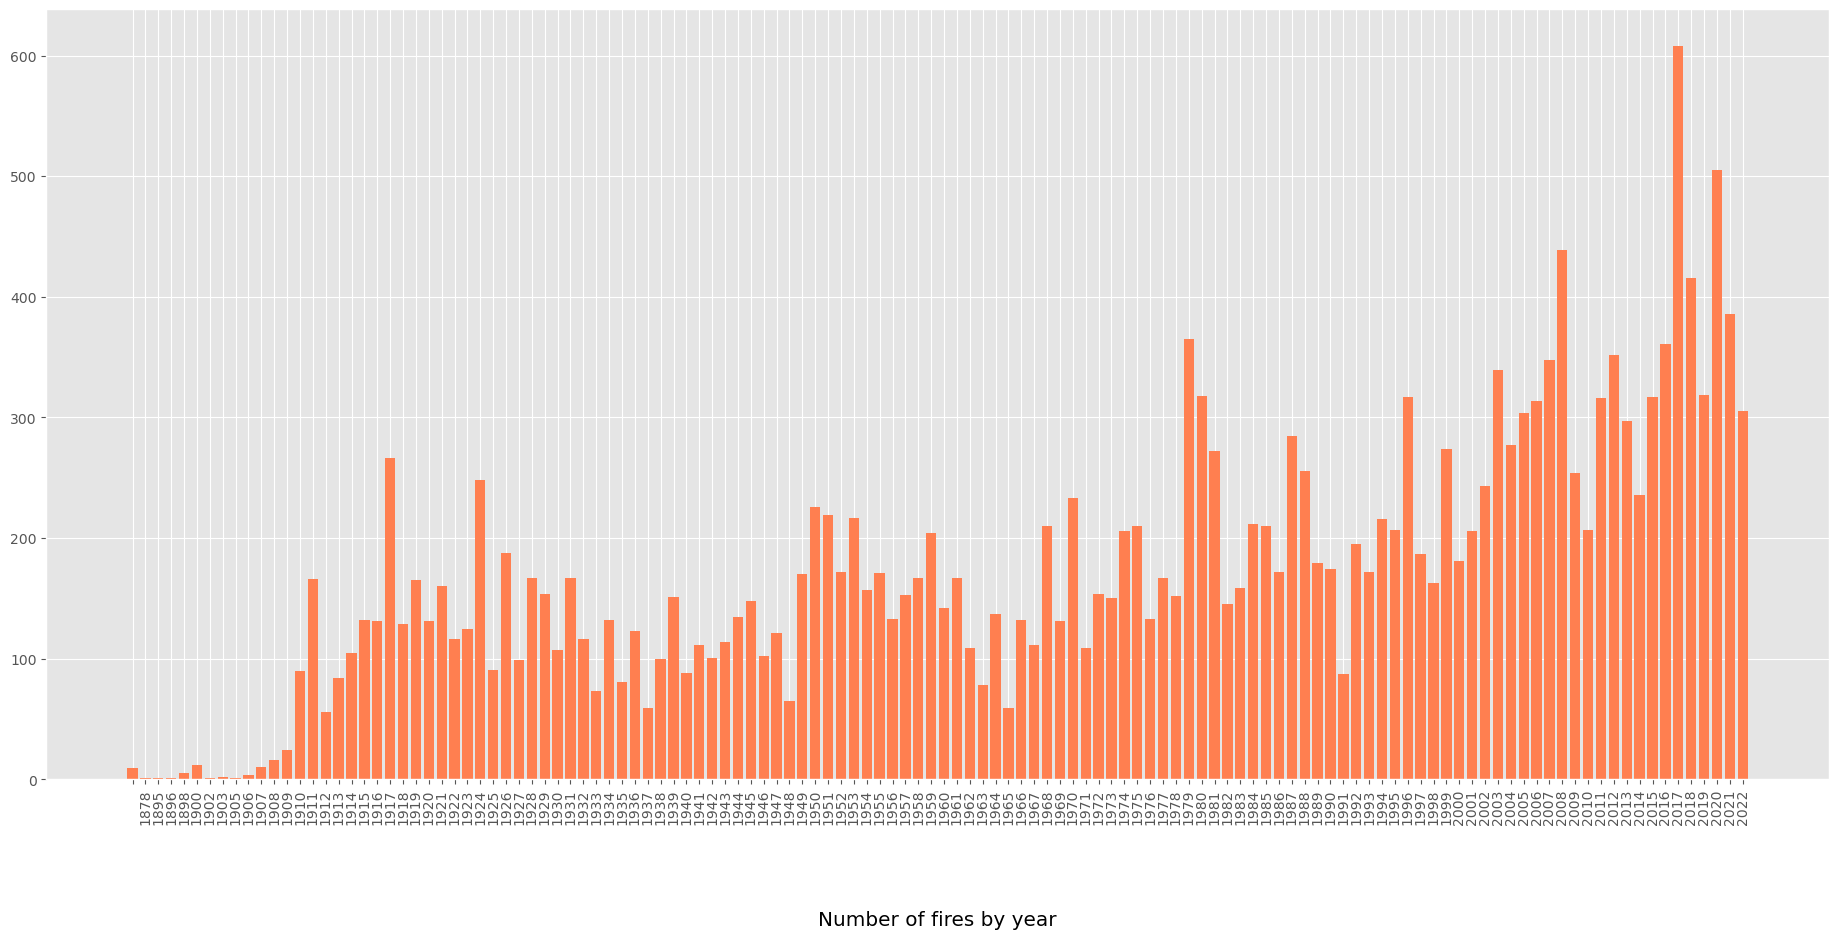

In [51]:
fig, ax = plt.subplots(figsize=(23,10))
ax.bar(x, y, color='coral')
plt.xticks(rotation=90)
plt.title('Number of fires by year', y=-0.2)

In [136]:
sorted_df = df.sort_values('YEAR_')
fire_sum = sorted_df.groupby('YEAR_').sum()
x = np.asarray(fire_sum.axes[0])
y = np.asarray(df.groupby('YEAR_')['GIS_ACRES'].sum())
y

array([3154.1778400000003, 59468.88, 628.1136, 7531.717, 28244.1997,
       24528.501920000002, 731.4816, 3649.3436, 214.2885, 3964.89087,
       1328.68542, 19751.942898, 34955.33696, 254816.991304,
       123472.206896, 40419.080838, 161725.426841, 73658.27024700001,
       55185.434702, 88528.913904, 439018.257251, 190458.526642,
       244409.443996, 139029.807423, 245682.31297, 342731.433081,
       272381.798987, 610545.239066, 78507.230119, 255028.599536,
       178417.720369, 550886.795494, 252561.15674099998, 61643.72824,
       265177.84044, 326915.968664, 92087.912104, 112191.7580052,
       65151.674192, 213582.819412, 21699.539422, 119209.361728,
       243282.9856093, 128464.768222, 87476.8494356, 262391.755337,
       248991.413363, 343786.746521, 248390.793348, 106279.238732,
       150451.67126540001, 176047.741704, 206849.34695099998,
       536003.01021, 303257.817958, 133399.2906577, 335875.47642970004,
       218268.969576, 386041.67126900004, 178798.542125, 202933

Text(0.5, -0.2, 'Number of acres by year')

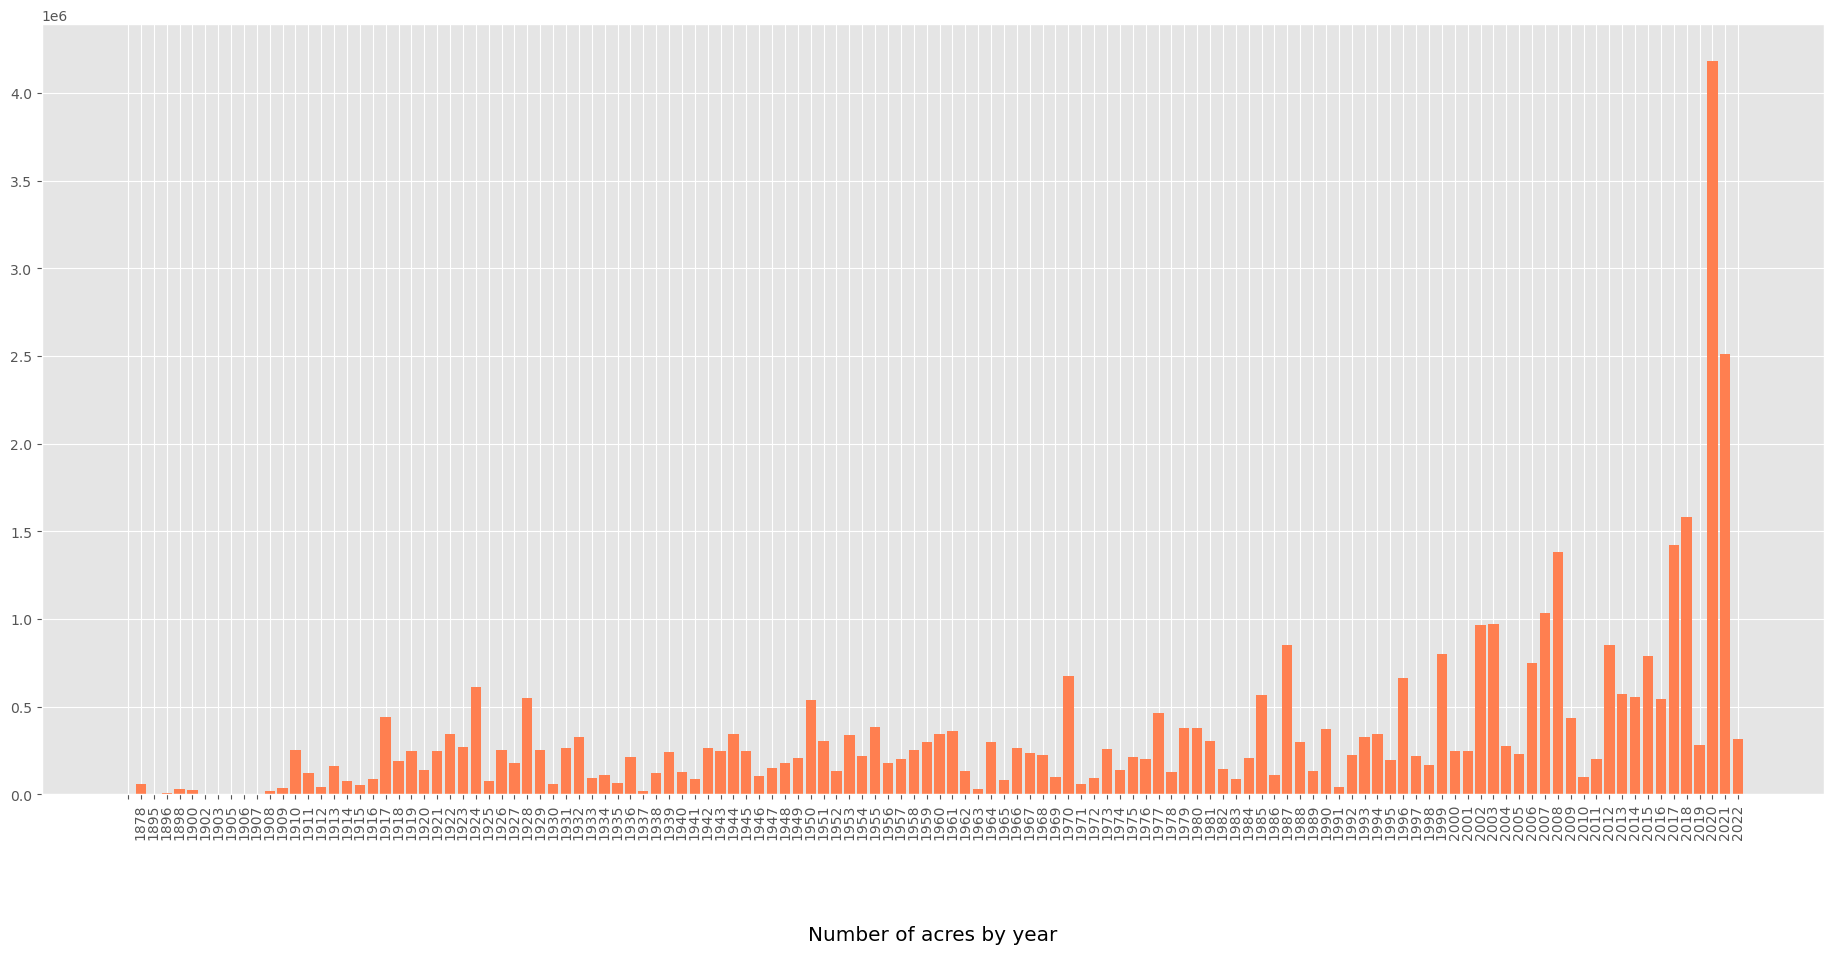

In [135]:
fig, ax = plt.subplots(figsize=(23,10))
ax.bar(x, y, color='coral')
plt.xticks(rotation=90)
plt.title('Number of acres by year', y=-0.2)